# Lab 2 

## Exercício 1

### 1) e 2)

In [173]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math

import pandas as pd
from tabulate import tabulate
pd.set_option("display.max_rows", None)

from ucimlrepo import fetch_ucirepo

from collections import Counter

In [174]:
X = [[0, 0],
     [0, 1],
     [1, 0],
     [1, 1]]

out_and = [0, 0, 0, 1]

w0 = random.uniform(-0.5, 0.5)
w1 = random.uniform(-0.5, 0.5)
w2 = random.uniform(-0.5, 0.5 )
print(f"Weights: w0={w0}, w1={w1}, w2={w2}")

def f(s):
    if s > 0.5:
        return 1
    else:
        return 0

Weights: w0=0.44739706472864404, w1=-0.14967070438987096, w2=0.4306116348769342


In [175]:
o = []

for input in X:
    s = w0 + w1 * input[0] + w2 * input[1]
    y = f(s)

    o.append(y)

print(o)

[0, 1, 0, 1]


### 3)

In [176]:
#Erro 
e = []
for i in range(len(out_and)):
    e.append(out_and[i] - o[i])

print("Erro (d - o):", e)

Erro (d - o): [0, -1, 0, 0]


### 4), 5) e 6)

Rede aprendeu o padrão completo!10


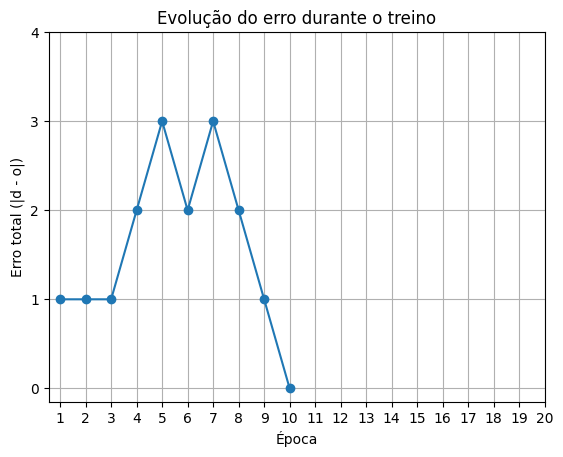

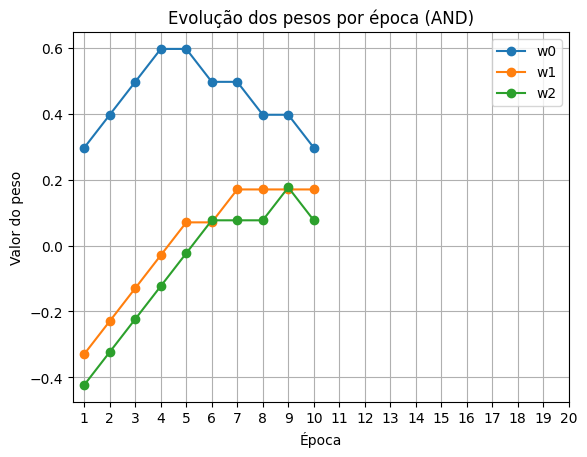

In [177]:
# Taxa de aprendizagem
alphaAnd = 1e-1

w0 = random.uniform(-0.5, 0.5)
w1 = random.uniform(-0.5, 0.5)
w2 = random.uniform(-0.5, 0.5)

# Número de épocas
epocas = 20
e = []
w_hist = []

for epoca in range(epocas):
    total_erro = 0
    
    w_hist.append((w0, w1, w2))

    for i, input in enumerate(X):
        s = w0 + w1 * input[0] + w2 * input[1]
        y = f(s)

        # Cálculo do erro
        erro = out_and[i] - y
        
        total_erro += abs(erro)

        # Atualização dos pesos
        w0 = w0 + alphaAnd * erro
        w1 = w1 + alphaAnd * erro * input[0]
        w2 = w2 + alphaAnd * erro * input[1]
        
    e.append(total_erro)
    
    if total_erro == 0:
        print("Rede aprendeu o padrão completo!"+ str(epoca+1))
        break

#(a) Plot erro por época
plt.plot(range(1, len(e) + 1), e, marker='o')
plt.xticks(range(1, epocas + 1, 1))
plt.yticks(range(5))
plt.xlabel("Época")
plt.ylabel("Erro total (|d - o|)")
plt.title("Evolução do erro durante o treino")
plt.grid(True)
plt.show()

#(b) Plot pesos por época
w0_list = [w[0] for w in w_hist]
w1_list = [w[1] for w in w_hist]
w2_list = [w[2] for w in w_hist]

plt.plot(range(1, len(w0_list)+1), w0_list, label='w0', marker='o')
plt.plot(range(1, len(w1_list)+1), w1_list, label='w1', marker='o')
plt.plot(range(1, len(w2_list)+1), w2_list, label='w2', marker='o')
plt.xticks(range(1, epocas + 1, 1))
plt.title("Evolução dos pesos por época (AND)")
plt.xlabel("Época")
plt.ylabel("Valor do peso")
plt.legend()
plt.grid(True)
plt.show()


### 6)(c)

Aumentar o parametro α aumenta a velocidade de convergência como seria de esperar, mas um aumento muito elevado resulta em instablidade dos valores dos pesos.
Ao testarmos alguns valores do α manualmente, concluímos que 1e-1 parece-nos que é aproximadamente o melhor valor, pois confere uma convergência rápida e uma boa establidade nos valores de erro.

### 6)(d)

In [178]:
def treinar(alphaAnd=1e-3, epocas=20):
    w0 = random.uniform(-0.5, 0.5)
    w1 = random.uniform(-0.5, 0.5)
    w2 = random.uniform(-0.5, 0.5)

    e = []
    w_hist = []

    for epoca in range(epocas):
        total_erro = 0
        #print(f"\nÉpoca {epoca+1}")
        
        w_hist.append((w0, w1, w2))
        #print(f"Weights: w0={w0}, w1={w1}, w2={w2}")

        for i, input in enumerate(X):
            s = w0 + w1 * input[0] + w2 * input[1]
            #print(f"Resultado pré f():{s}")
            y = f(s)
            #print(f"Resultado:{y}")

            # Cálculo do erro
            erro = out_and[i] - y
            #print(f"out_and:{out_and[i]}    y:{y}    Erro:{erro}")
            
            total_erro += abs(erro)

            # Atualização dos pesos
            w0 = w0 + alphaAnd * erro
            w1 = w1 + alphaAnd * erro * input[0]
            w2 = w2 + alphaAnd * erro * input[1]
            
        e.append(total_erro)
        

        #print(f"Erro total nesta época: {total_erro}")
        if total_erro == 0:
            # print("Rede aprendeu o padrão completo!"+ str(epoca+1))
            return epoca + 1, w0, w1, w2
            

    # print("\nPesos finais:")    
    # print(f"w0 = {w0:.5f}, w1 = {w1:.5f}, w2 = {w2:.5f}")
    return epocas,w0, w1, w2


Média de épocas até convergência: 4.83
Desvio-padrão: 2.37


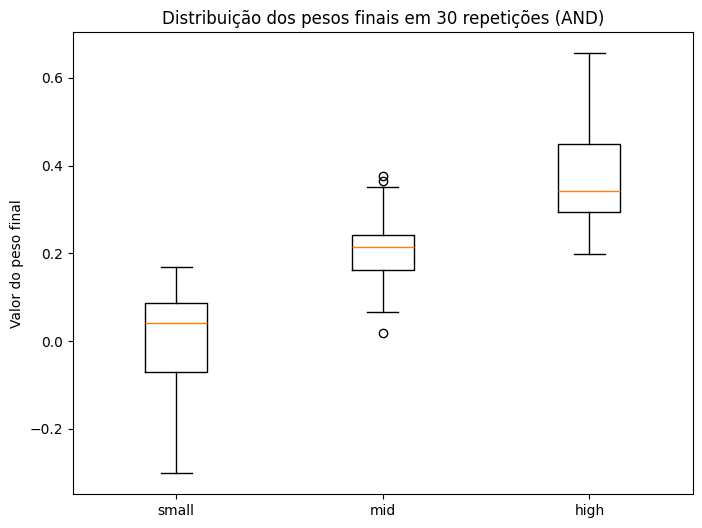

In [179]:
# Repetições
repeticoes = 30
resultados = []
small=[]
mid=[]
high=[]

for _ in range(repeticoes):
    epocas,w0,w1,w2 = treinar(alphaAnd, 20)
    #print(f"Convergência em {epocas} épocas.")
    resultados.append(epocas)
    aux = [w0, w1, w2]
    aux.sort()
    small.append(aux[0])
    mid.append(aux[1])
    high.append(aux[2])

# Média e desvio-padrão
media = sum(resultados) / len(resultados)
variancia = sum((x - media)**2 for x in resultados) / len(resultados)
dp = math.sqrt(variancia)

#print("\nResultados das 20 execuções:", resultados)
print(f"Média de épocas até convergência: {media:.2f}")
print(f"Desvio-padrão: {dp:.2f}")

# boxplot dos pesos finais
plt.figure(figsize=(8,6))
plt.boxplot([small, mid, high],
            tick_labels=['small', 'mid', 'high'])
plt.title("Distribuição dos pesos finais em 30 repetições (AND)")
plt.ylabel("Valor do peso final")
plt.show()

### 7)

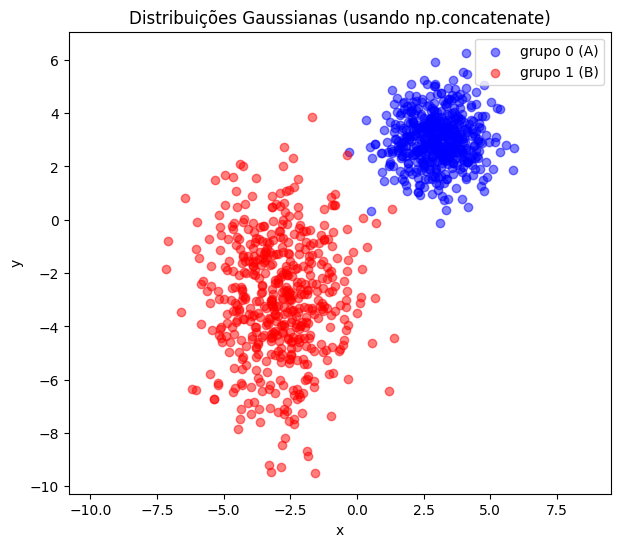

In [180]:
# Conjunto A
mean1 = [3, 3]
cov1 = [[1, 0], [0, 1]]
a = np.random.multivariate_normal(mean1, cov1, 500).T

# Conjunto B
mean2 = [-3, -3]
cov2 = [[2, 0], [0, 5]]
b = np.random.multivariate_normal(mean2, cov2, 500).T

a_labels = np.zeros((1, a.shape[1]))   # (1, 500)
b_labels = np.ones((1, b.shape[1]))    # (1, 500)


a_full = np.concatenate((a, a_labels), axis=0)  # (3, 500)
b_full = np.concatenate((b, b_labels), axis=0)  # (3, 500)

c = np.concatenate((a_full, b_full), axis=1)
c = c.T

np.random.shuffle(c)

# Separar coordenadas para plot
x = c[:, 0]
y = c[:, 1]
labels = c[:, 2]

alpha = 1e-2

plt.figure(figsize=(7,6))
plt.scatter(x[labels==0], y[labels==0], color='blue', alpha=0.5, label='grupo 0 (A)')
plt.scatter(x[labels==1], y[labels==1], color='red', alpha=0.5, label='grupo 1 (B)')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribuições Gaussianas (usando np.concatenate)')
plt.legend()
plt.show()


### 8)

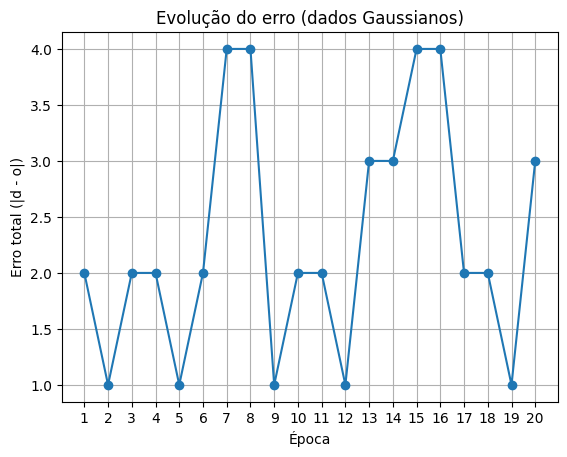

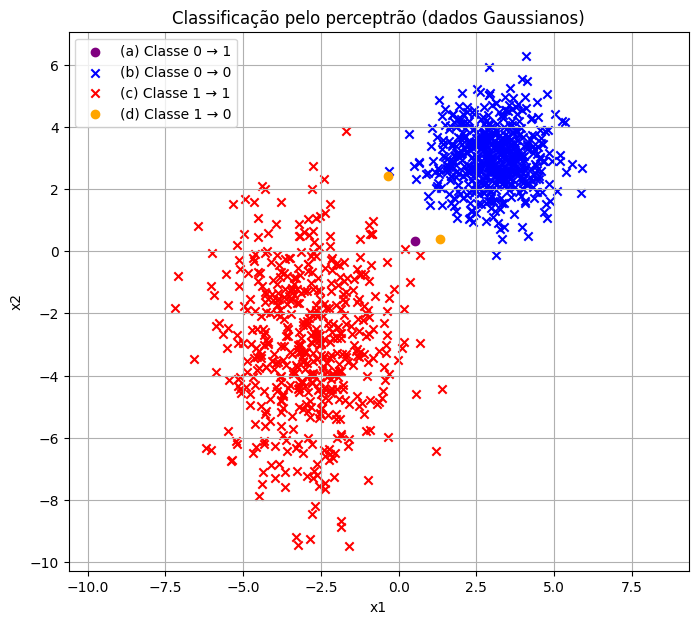

In [181]:
X = c[:, 0:2]   # coordenadas (x1, x2)
d = c[:, 2]     # labels (0 ou 1)

def f(s):
    return 1 if s >= 0 else 0

def treinar(X, d, alpha, epocas):
    w0 = random.uniform(-0.5, 0.5)
    w1 = random.uniform(-0.5, 0.5)
    w2 = random.uniform(-0.5, 0.5)
    
    e = []          # histórico de erro (erro final de cada época)
    w_hist = []     # histórico de pesos

    for epoca in range(epocas):
        w_hist.append((w0, w1, w2))
        
        # Atualização dos pesos para todos os exemplos
        for i, entrada in enumerate(X):
            s = w0 + w1 * entrada[0] + w2 * entrada[1]
            y = f(s)
            erro = d[i] - y

            # atualização dos pesos
            w0 += alpha * erro
            w1 += alpha * erro * entrada[0]
            w2 += alpha * erro * entrada[1]

        # cálculo do erro após os pesos da época estarem atualizados 
        Y_pred_epoca = np.array([f(w0 + w1*x1 + w2*x2) for x1, x2 in X])
        erro_epoca = np.sum(np.abs(d - Y_pred_epoca))  # número de classificações erradas
        e.append(erro_epoca)

        if erro_epoca == 0:
            # print("Rede aprendeu completamente na época", epoca + 1)
            break
        # else:
            # print(f"Época {epoca+1}: erro final = {erro_epoca}")

    return w0, w1, w2, e, w_hist

# Treinar o perceptrão 
w0, w1, w2, e, w_hist = treinar(X,d, alpha, epocas=20)

# Plot
plt.plot(range(1, len(e)+1), e, marker='o')
plt.xlabel("Época")
plt.ylabel("Erro total (|d - o|)")
plt.title("Evolução do erro (dados Gaussianos)")
plt.xticks(range(1, len(e)+1))
plt.grid(True)
plt.show()

# Classificar os pontos
Y_pred = []
for entrada in X:
    s = w0 + w1 * entrada[0] + w2 * entrada[1]
    Y_pred.append(f(s))
Y_pred = np.array(Y_pred)

# (a) Pontos da 1ª dist (label 0) classificados como 1
a_class1 = X[(d == 0) & (Y_pred == 1)]
# (b) Pontos da 1ª dist (label 0) classificados como 0
a_class0 = X[(d == 0) & (Y_pred == 0)]
# (c) Pontos da 2ª dist (label 1) classificados como 1
b_class1 = X[(d == 1) & (Y_pred == 1)]
# (d) Pontos da 2ª dist (label 1) classificados como 0
b_class0 = X[(d == 1) & (Y_pred == 0)]

#  Gráfico colorido 4 grupos
plt.figure(figsize=(8,7))
plt.scatter(a_class1[:,0], a_class1[:,1], color='purple', marker='o', label='(a) Classe 0 → 1')
plt.scatter(a_class0[:,0], a_class0[:,1], color='blue', marker='x', label='(b) Classe 0 → 0')
plt.scatter(b_class1[:,0], b_class1[:,1], color='red', marker='x', label='(c) Classe 1 → 1')
plt.scatter(b_class0[:,0], b_class0[:,1], color='orange', marker='o', label='(d) Classe 1 → 0')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Classificação pelo perceptrão (dados Gaussianos)")
plt.axis("equal")
plt.legend()
plt.grid(True)
plt.show()

In [182]:
TP = np.sum((d == 1) & (Y_pred == 1))
TN = np.sum((d == 0) & (Y_pred == 0))
FP = np.sum((d == 0) & (Y_pred == 1))
FN = np.sum((d == 1) & (Y_pred == 0))
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
matriz_confusao = np.array([[TN, FP], [FN, TP]])

TP: 498, TN: 499, FP: 1, FN: 2


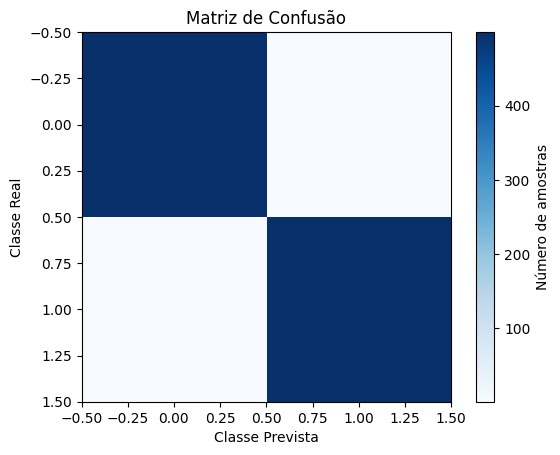

In [183]:
# Impressão visual
plt.imshow(matriz_confusao, cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.colorbar(label="Número de amostras")
plt.show()

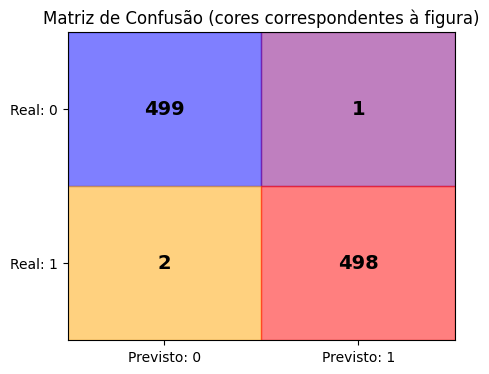

In [184]:

def calcular_metricas(d, Y_pred):
    TP = np.sum((d == 1) & (Y_pred == 1))
    TN = np.sum((d == 0) & (Y_pred == 0))
    FP = np.sum((d == 0) & (Y_pred == 1))
    FN = np.sum((d == 1) & (Y_pred == 0))
    # print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

    acc = (TP + TN) / len(d)
    # print(acc)

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return acc, precision, recall, f1

#correr a função
calcular_metricas(d, Y_pred)

matriz_confusao = np.array([[TN, FP],
                            [FN, TP]])

# Cores correspondentes à tua figura
cores = np.array([["#0000FF", "#800080"],   # azul, roxo
                  ["#FFA500", "#FF0000"]])  # laranja, vermelho

# Criar gráfico
fig, ax = plt.subplots(figsize=(5, 4))
for i in range(2):
    for j in range(2):
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=cores[i, j], alpha=0.5 ))

# Adicionar valores numéricos
for i in range(2):
    for j in range(2):
        ax.text(j + 0.5, i + 0.5, str(matriz_confusao[i, j]),
                va='center', ha='center', fontsize=14, color='black', weight='bold')

# Ajustes de eixos
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_xticks([0.5, 1.5])
ax.set_yticks([0.5, 1.5])
ax.set_xticklabels(['Previsto: 0', 'Previsto: 1'])
ax.set_yticklabels(['Real: 0', 'Real: 1'])
ax.set_title("Matriz de Confusão (cores correspondentes à figura)")
plt.gca().invert_yaxis()
plt.grid(False)
plt.show()

In [185]:
def treinarv2(X, d, alpha=1e-3, epocas=20):
    w0 = random.uniform(-0.5, 0.5)
    w1 = random.uniform(-0.5, 0.5)
    w2 = random.uniform(-0.5, 0.5)

    for _ in range(epocas):
        total_erro = 0

        for i, entrada in enumerate(X):
            s = w0 + w1 * entrada[0] + w2 * entrada[1]
            y = f(s)
            erro = d[i] - y
            
            w0 += alpha * erro
            w1 += alpha * erro * entrada[0]
            w2 += alpha * erro * entrada[1]

        # Verificar erro após a atualização completa
        Y_pred = np.array([f(w0 + w1*x1 + w2*x2) for x1, x2 in X])
        total_erro = np.sum(np.abs(d - Y_pred))

        if total_erro == 0:
            # print("Rede aprendeu completamente!")
            break
        # else:
            # print(f"Erro total nesta época: {total_erro}")
        
    # Previsao final
    Y_pred = []

    for entrada in X:
        s = w0 + w1 * entrada[0] + w2 * entrada[1]
        Y_pred.append(f(s))
    
    return np.array(Y_pred)

n_testes = 30
accs, precs, recs, f1s = [], [], [], []

for _ in range(n_testes):
    Y_pred = treinarv2(X, d, alpha, epocas=20)

    acc, prec, rec, f1 = calcular_metricas(d, Y_pred)

    accs.append(acc)
    precs.append(prec)
    recs.append(rec)
    f1s.append(f1)


# Calcular as médias
acc_med = np.mean(accs)
prec_med = np.mean(precs)
rec_med = np.mean(recs)
f1_med = np.mean(f1s)

print (f"Médias após {n_testes} testes:")
print(f"Accuracy: {acc_med:.10f}")           
print(f"Precision: {prec_med:.10f}")
print(f"Recall: {rec_med:.10f}")
print(f"F1-Score: {f1_med:.10f}")

Médias após 30 testes:
Accuracy: 0.9970333333
Precision: 0.9979961181
Recall: 0.9960666667
F1-Score: 0.9970294928


## Exercício 2

In [186]:
def stratified_split_indices(y, test_size=0.3):
    rng = np.random.default_rng()
    train_idx = []
    test_idx = []

    for cls in np.unique(y):
        idx = np.where(y == cls)[0].copy()
        rng.shuffle(idx)

        n_test = int(np.round(len(idx) * test_size))

        test_idx.extend(idx[:n_test])
        train_idx.extend(idx[n_test:])

    return np.array(train_idx, dtype=int), np.array(test_idx, dtype=int)

def knn_predict(X_train, y_train, X_test, k=3):

    X_train_np = X_train.to_numpy()
    y_train_np = y_train.iloc[:, 0].to_numpy()
    X_test_np  = X_test.to_numpy()
    
    predictions = []

    for test_row in X_test_np:
        distances = []
        
        for train_row, label in zip(X_train_np, y_train_np):
            distances.append((np.sqrt(np.sum((test_row - train_row) ** 2)), label))

        distances.sort(key=lambda x: x[0])
        k_nearest_labels = [label for _, label in distances[:k]]

        predictions.append(Counter(k_nearest_labels).most_common(1)[0][0])

    return predictions

def build_confusion_matrix(y_true, predictions):

    labels = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}

    cm = np.zeros((3, 3), dtype=int)
    
    for true_lbl, pred_lbl in zip(y_true, predictions):
        i = labels[true_lbl]
        j = labels[pred_lbl]
        cm[i, j] += 1
    
    return cm

def plot_confusion_matrix(cm):

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.colorbar()
    plt.xticks(np.arange(3), ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
    plt.yticks(np.arange(3), ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
    plt.title("Confusion Matrix, without normalization")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    for i in range(3):
        for j in range(3):
            color = "white" if cm[i, j] > cm.max() / 2 else "black"
            plt.text(j, i, cm[i, j], ha="center", va="center", color=color)
    
    plt.tight_layout()
    plt.show()

def calcular_metricas(cm):

    precisions, recalls, f1s = [], [], []

    # Calcular métricas por classe
    for c in range(3):
        TP = cm[c, c]
        FP = cm[:, c].sum() - TP
        FN = cm[c, :].sum() - TP

        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)

    precision_macro = np.mean(precisions)
    recall_macro = np.mean(recalls)
    f1_macro = np.mean(f1s)

    return precision_macro, recall_macro, f1_macro

In [187]:
iris = fetch_ucirepo(id=53) 

X = iris.data.features.copy()   # features (pandas DataFrame)
y = iris.data.targets.copy()    # targets (pandas DataFrame)

### 1) e 2)

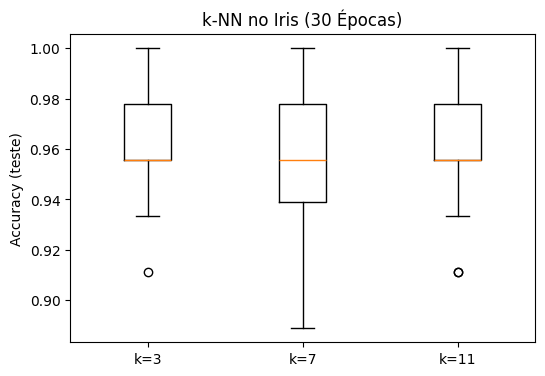

k = 3


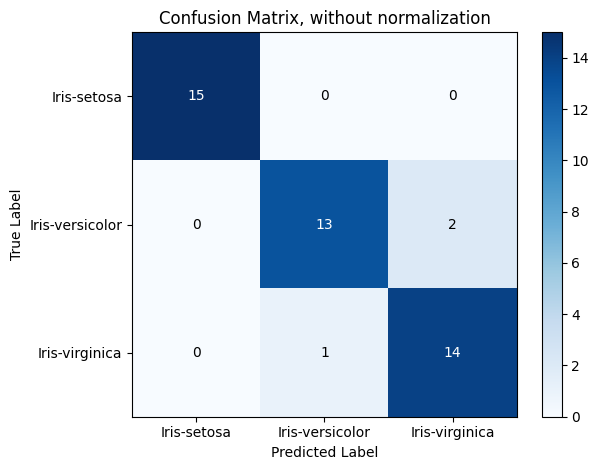

Accuracy: 0.9555555556
Precision: 0.9607843137
Recall: 0.9555555556
F1-Score: 0.9555555556
-------------------------
k = 7


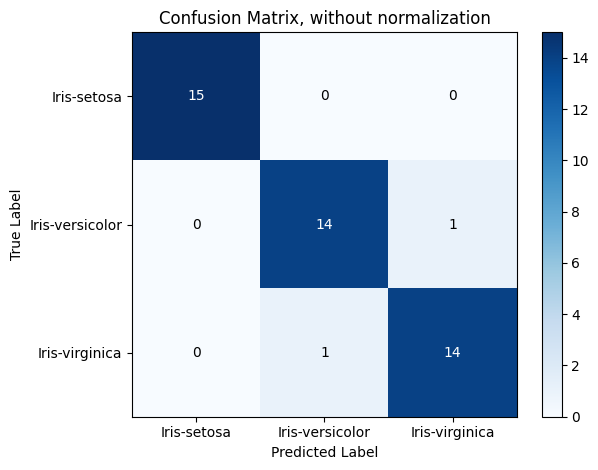

Accuracy: 0.9555555556
Precision: 0.9607843137
Recall: 0.9555555556
F1-Score: 0.9555555556
-------------------------
k = 11


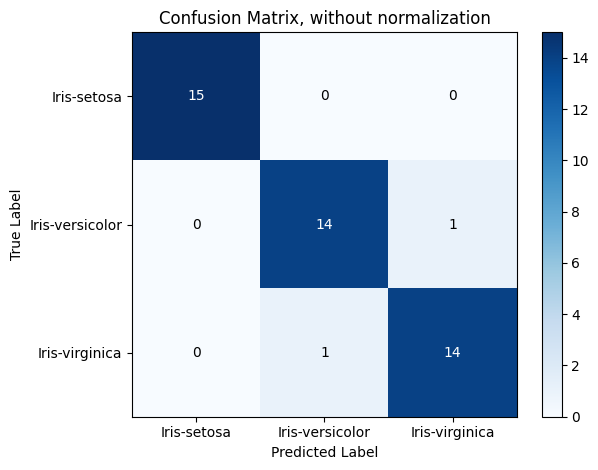

Accuracy: 0.9555555556
Precision: 0.9607843137
Recall: 0.9555555556
F1-Score: 0.9555555556
-------------------------


In [188]:
test_size = 0.30
ks = [3, 7, 11]

cm = []
accuracies, prec, rec, f1 = {k: [] for k in ks}, {k: [] for k in ks}, {k: [] for k in ks}, {k: [] for k in ks}

for i in range(30):
    train_idx, test_idx = stratified_split_indices(y, test_size)
    X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
    y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx].iloc[:, 0].to_list()

    for k in ks:
        y_pred = knn_predict(X_tr, y_tr, X_te, k)
        accuracies[k].append(np.mean(np.array(y_te) == np.array(y_pred)))
        p, r, f = calcular_metricas(build_confusion_matrix(y_te, y_pred))
        prec[k].append(p)
        rec[k].append(r)
        f1[k].append(f) 

        if i == 29:
            cm.append(build_confusion_matrix(y_te, y_pred))

data = [accuracies[k] for k in ks]
plt.figure(figsize=(6,4))
plt.boxplot(data, tick_labels=[f'k={k}' for k in ks])
plt.ylabel('Accuracy (teste)')
plt.title('k-NN no Iris (30 Épocas)')
plt.show()

for i in range(3):

    print("k = " + str(ks[i]))
    plot_confusion_matrix(cm[i])

    acc_med = np.median(accuracies[ks[i]])
    prec_med = np.median(prec[ks[i]])
    rec_med = np.median(rec[ks[i]])
    f1_med = np.median(f1[ks[i]])

    print(f"Accuracy: {acc_med:.10f}")           
    print(f"Precision: {prec_med:.10f}")
    print(f"Recall: {rec_med:.10f}")
    print(f"F1-Score: {f1_med:.10f}")
    print("-------------------------")

### 3)

No algoritmo k-NN, cada ponto desconhecido é classificado segundo a classe mais frequente entre os k vizinhos mais próximos.

- Se k for par, pode acontecer um empate entre classes. Neste caso, o classificador precisa de um critério de desempate, o que introduz instabilidade.

- Se k for ímpar, garante-se que há sempre uma maioria clara entre as duas classes, desde que o k seja maior que o número de classes. No nosso caso há a possibilidade de empate para um k = 3 se cada vizinho ser de uma classe diferente.

## Exercício 3

### 1)

In [189]:
X = iris.data.features.copy()
y = iris.data.targets.copy()

features = {"sepal length", "sepal width", "petal length", "petal width"}

for feature in features:
    q1, q2 = X[feature].quantile([1/3, 2/3])
    X[feature] = pd.cut(X[feature],
                            bins=[-np.inf, q1, q2, np.inf],
                            labels=['low','medium','high'])

print(X.to_markdown())

|     | sepal length   | sepal width   | petal length   | petal width   |
|----:|:---------------|:--------------|:---------------|:--------------|
|   0 | low            | high          | low            | low           |
|   1 | low            | medium        | low            | low           |
|   2 | low            | medium        | low            | low           |
|   3 | low            | medium        | low            | low           |
|   4 | low            | high          | low            | low           |
|   5 | low            | high          | low            | low           |
|   6 | low            | high          | low            | low           |
|   7 | low            | high          | low            | low           |
|   8 | low            | low           | low            | low           |
|   9 | low            | medium        | low            | low           |
|  10 | low            | high          | low            | low           |
|  11 | low            | high         

In [190]:
def NaiveBayesClassifier(X_tr, y_tr, X_te):
    classes = {"Iris-setosa", "Iris-versicolor", "Iris-virginica"}

    # Calculate class probabilities - P(y)
    class_probs = y_tr.value_counts(normalize=True)
    class_probs.index = classes
    class_probs = class_probs.to_dict()

    feature_probs = {}

    for cls in classes:
        # Calculate feature probabilities - P(x|y)
        # ex: "y = Iris-setosa"
        class_data = X_tr[y_tr["class"] == cls]
        feature_probs[cls] = {}

        for feature in features:     # ex: "x = sepal length"
            feature_probs[cls][feature] = class_data.value_counts(feature, normalize=True).to_dict()


    predictions = []
    
    for _,row in X_te.iterrows():
        class_scores = {}
        
        for cls in classes:
            score = class_probs[cls]    #P(y)
            
            # Multiply probabilities of features - P(y)*P(x1|y)*P(x2|y)...
            for feature in features:
                value = row[feature]
                score *= feature_probs[cls][feature][value]
            
            class_scores[cls] = score
        
        # Predict class with highest score
        predicted_class = max(class_scores, key=class_scores.get)
        predictions.append(predicted_class)
        
    return predictions

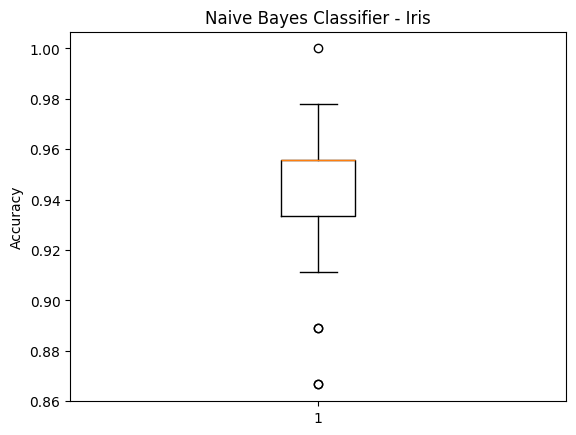

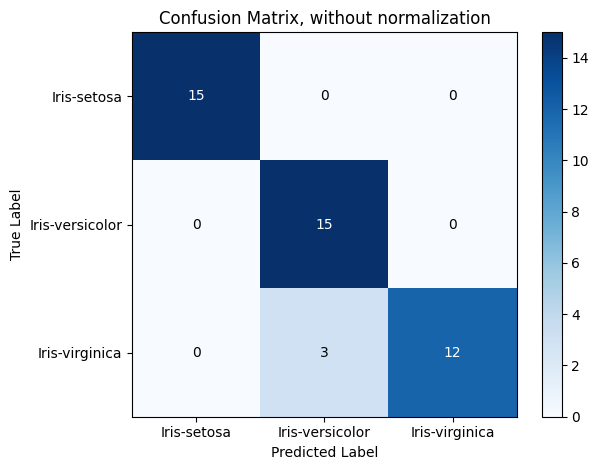

Accuracy: 0.9555555556
Precision: 0.9555555556
Recall: 0.9555555556
F1-Score: 0.9553571429


In [191]:
cm = None
accuracy, prec, rec, f1 = [], [], [], []

for i in range(30):
    train_idx, test_idx = stratified_split_indices(y, 0.30)
    X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
    y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx].iloc[:, 0].to_list()
    
    y_pred = NaiveBayesClassifier(X_tr, y_tr, X_te)
    
    accuracy.append(np.mean(np.array(y_te) == np.array(y_pred)))
    p, r, f = calcular_metricas(build_confusion_matrix(y_te, y_pred))
    prec.append(p)
    rec.append(r)
    f1.append(f) 

    if i == 29:
        cm = build_confusion_matrix(y_te, y_pred)

plt.figure()
plt.boxplot(accuracy)
plt.ylabel('Accuracy')
plt.title('Naive Bayes Classifier - Iris')
plt.show()

plot_confusion_matrix(cm)

acc_med = np.median(accuracy)
prec_med = np.median(prec)
rec_med = np.median(rec)
f1_med = np.median(f1)

print(f"Accuracy: {acc_med:.10f}")           
print(f"Precision: {prec_med:.10f}")
print(f"Recall: {rec_med:.10f}")
print(f"F1-Score: {f1_med:.10f}")

### 2)

Comparando com o k-NN é possível observarmos que as métricas como a "Accuracy", a "Precision", o "Recall" e o "F1-Score" são ligeiramente inferiores, mas mantém-se sempre acima do 90%.

## Exrecício 4

### 1)

In [192]:
X = iris.data.features.copy()
y = iris.data.targets.copy()
df = pd.concat([X, y], axis=1)

df['class'] = (df['class'] == 'Iris-setosa').astype(int) #1 = setosa, 0 = não-setosa

# 3) discretizar APENAS a 1ª coluna (sepal_length) em low/medium/high por quantis 33%/66%
q1, q2 = df['sepal length'].quantile([1/3, 2/3])
df['sepal length'] = pd.cut(df['sepal length'],
                                 bins=[-np.inf, q1, q2, np.inf],
                                 labels=['low','medium','high'])
print(df.to_markdown())

def entropy_binary(y_series):
    """Entropia de um alvo binário (1=setosa, 0=não-setosa)."""
    p = y_series.mean() #proporção de 1's porque e um conjunto binário
    if p == 0 or p == 1: #no caso de o conjunto ser todo de uma classe
        return 0.0 
    return -(p*np.log2(p) + (1-p)*np.log2(1-p))

H_S = entropy_binary(df['class'])
print("Entropia(S) conjunto total", round(H_S, 4))

H_low = entropy_binary(df[df['sepal length']=='low']['class'])
H_medium = entropy_binary(df[df['sepal length']=='medium']['class'])
H_high = entropy_binary(df[df['sepal length']=='high']['class'])

print("Entropia(S_low):   ", round(H_low, 4))
print("Entropia(S_medium):", round(H_medium, 4))
print("Entropia(S_high):  ", round(H_high, 4))

n = len(df)
n_low = len(df[df['sepal length']=='low'])
n_medium = len(df[df['sepal length']=='medium'])
n_high = len(df[df['sepal length']=='high'])

weighted = (n_low/n)*H_low + (n_medium/n)*H_medium + (n_high/n)*H_high
gain = H_S - weighted

print("Gain(S, sepal_length):", round(gain, 4))



|     | sepal length   |   sepal width |   petal length |   petal width |   class |
|----:|:---------------|--------------:|---------------:|--------------:|--------:|
|   0 | low            |           3.5 |            1.4 |           0.2 |       1 |
|   1 | low            |           3   |            1.4 |           0.2 |       1 |
|   2 | low            |           3.2 |            1.3 |           0.2 |       1 |
|   3 | low            |           3.1 |            1.5 |           0.2 |       1 |
|   4 | low            |           3.6 |            1.4 |           0.2 |       1 |
|   5 | low            |           3.9 |            1.7 |           0.4 |       1 |
|   6 | low            |           3.4 |            1.4 |           0.3 |       1 |
|   7 | low            |           3.4 |            1.5 |           0.2 |       1 |
|   8 | low            |           2.9 |            1.4 |           0.2 |       1 |
|   9 | low            |           3.1 |            1.5 |           0.1 |   

### 2)
Fazendo o ganho da partiçao sugerida no inicio obtivemos um valor de 0.5587 o que nao e um valor ideal, que significa que a partição não e ideal mas pode ajudar na diferenciaçao dos dois conjuntos em estudo.

### 3)

In [193]:
X = iris.data.features.copy()
y = iris.data.targets.copy()
df = pd.concat([X, y], axis=1)

df['class'] = (df['class'] == 'Iris-setosa').astype(int) #1 = setosa, 0 = não-setosa

feature_cols = ['sepal length', 'sepal width', 'petal length', 'petal width']

gains = {}

for feature in features:

    q1, q2 = df[feature].quantile([1/3, 2/3])
    df[feature] = pd.cut(df[feature],
                        bins=[-np.inf, q1, q2, np.inf],
                        labels=['low', 'medium', 'high'])
    
    # Calcular entropias dos subconjuntos
    H_S = entropy_binary(df['class'])
    weighted = 0.0
    
    for value in ['low', 'medium', 'high']:
        subset = df[df[feature] == value]
        H_subset = entropy_binary(subset['class'])
        weighted += (len(subset) / len(df)) * H_subset
    
    # Calcular ganho
    gain = H_S - weighted
    gains[feature] = gain

print("\nGanho de informação por feature:")
for feature, gain in gains.items():
    print(f"{feature:15s}: {gain:.4f}")

# Mostrar qual é a melhor coluna
best_feature = max(gains, key=gains.get)
print(f"\nA melhor feature para dividir o conjunto é: {best_feature} com ganho {gains[best_feature]:.4f}")



Ganho de informação por feature:
sepal length   : 0.5587
petal length   : 0.9183
petal width    : 0.9183
sepal width    : 0.3081

A melhor feature para dividir o conjunto é: petal length com ganho 0.9183


As variáveis petal_length e petal_width apresentam o maior ganho de informação (~0.92), o que demonstra que possui o maior potencial discriminativo entre Iris-setosa e as restantes espécies.
Isto significa que, ao particionar os dados com base nessa variável, a incerteza sobre a classe do exemplo reduz-se quase totalmente.

### 4) 
A melhor divisão (split) é aquela que produz a maior redução da entropia, isto é, o maior ganho de informação (Information Gain – IG). Assim, o atributo com maior IG é selecionado como nó raiz, pois é o que mais contribui para diminuir a incerteza sobre a classe. No caso do conjunto Iris, o atributo petal_length apresenta o maior ganho (≈ 0,9183), sendo, portanto, o melhor critério inicial para dividir os dados e distinguir Iris-setosa das restantes espécies.
O conjunto é então dividido consoante os valores de petal_length (low, medium, high), e o processo repete-se recursivamente nos subconjuntos, escolhendo sempre o atributo mais informativo até que os nós sejam puros ou não existam mais variáveis relevantes.